In [1]:
%aiida
%load_ext autoreload
%autoreload 2

In [2]:
from pprint import pprint
from phonopy.structure.cells import Supercell
from phonopy.structure.atoms import PhonopyAtoms
from twinpy.analysis.shear_analyzer import ShearAnalyzer
from twinpy.structure.standardize import StandardizeCell
from twinpy.interfaces.aiida import get_cell_from_aiida, ShearWorkChain
from twinpy.lattice.brillouin import get_labels_for_twin
from twinpy.structure.base import get_cell_from_phonopy_structure
from aiida.plugins import WorkflowFactory
import spglib
import numpy as np
from matplotlib import pyplot as plt
# shear_pk = 218482  # aiida
# shear_pk = 114464  # twinpy
shear_pk = 114436  # twinpy
RELAX_WF = WorkflowFactory('vasp.relax')
PHONOPY_WF = WorkflowFactory('phonopy.phonopy')

In [35]:
shear_analyzer.standardizes[0].rotation_matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [52]:
shear_workchain = ShearWorkChain(shear_pk=shear_pk)
shear_workchain._shear_conf
shear_analyzer = shear_workchain.get_analyzer()
# shear_analyzer.input_cells[0]
# print(shear_analyzer.original_cells[0][0])
relax_cells = shear_analyzer.get_relax_cells_with_original_basis()
for i in range(len(relax_cells)):
    print(i)
    # print(shear_analyzer.original_cells[i][1])
    # print(shear_analyzer.input_cells[i][1])
    stdcell = shear_analyzer.standardizes[i].get_standardized_cell(to_primitive=True, no_idealize=False, no_sort=False)
    orig = shear_analyzer.original_cells[i]
    inp = shear_analyzer.input_cells[i]
    if i == 1:
        print(stdcell)
        print(inp)
    # print(np.dot(orig[0].T, orig[1].T).T)
    # print(np.dot(inp[0].T, inp[1].T).T)
    
    
    
    # print(shear_analyzer.relax_cells[i][1])
    # _, sort_list = shear_analyzer.standardizes[i].get_standardized_cell(to_primitive=False, no_idealize=False, no_sort=False, get_sort_list=True)
    # print(sort_list)

0
1
(array([[ 2.45201684, -1.44793731,  0.        ],
       [ 2.45201684,  1.44793731,  0.        ],
       [-0.01429534,  0.        ,  4.68744125]]), array([[0.66666667, 0.66666667, 0.75      ],
       [0.33333333, 0.33333333, 0.25      ]]), [22, 22])
(array([[ 2.45201684, -1.44793731,  0.        ],
       [ 2.45201684,  1.44793731,  0.        ],
       [-0.01429534,  0.        ,  4.68744125]]), array([[0.33333333, 0.33333333, 0.25      ],
       [0.66666667, 0.66666667, 0.75      ]]), ['Ti', 'Ti'])
2
3
4


In [47]:
stdcell

(array([[ 1.44793731, -2.29149494,  0.        ],
        [ 1.44793731,  2.29149494,  0.        ],
        [ 0.        ,  0.        ,  5.01580198]]),
 array([[0.66666667, 0.33333333, 0.75      ],
        [0.33333333, 0.66666667, 0.25      ]]),
 [22, 22])

In [23]:
orig_cell = shear_analyzer.original_cells[0]
std = StandardizeCell(orig_cell)
# std.get_standardized_cell(to_primitive=True, no_idealize=True, no_sort=False, get_sort_list=True)

(array([[ 2.89587462,  0.        ,  0.        ],
       [-1.44793731,  2.50790099,  0.        ],
       [-0.        ,  0.        ,  4.58298989]]), array([[0.66666667, 0.33333333, 0.75      ],
       [0.33333333, 0.66666667, 0.25      ]]), array([22, 22], dtype=int32))
(array([[ 2.89587462,  0.        ,  0.        ],
       [-1.44793731,  2.50790099,  0.        ],
       [-0.        ,  0.        ,  4.58298989]]), array([[0.66666667, 0.33333333, 0.75      ],
       [0.33333333, 0.66666667, 0.25      ]]), array([22, 22], dtype=int32))
(array([[ 2.89587462,  0.        ,  0.        ],
       [-1.44793731,  2.50790099,  0.        ],
       [ 0.        ,  0.        ,  4.58298989]]), array([[0.66666667, 0.33333333, 0.75      ],
       [0.33333333, 0.66666667, 0.25      ]]), array([22, 22], dtype=int32))
(array([[ 2.89587462,  0.        ,  0.        ],
       [-1.44793731,  2.50790099,  0.        ],
       [ 0.        ,  0.        ,  4.58298989]]), array([[0.66666667, 0.33333333, 0.75      ],
 

In [20]:
std.cell

(array([[-1.44793731, -2.50790099,  0.        ],
        [-1.44793731,  2.50790099,  0.        ],
        [ 0.        ,  0.        , -4.58298989]]),
 array([[0.33333333, 0.66666667, 0.25      ],
        [0.66666667, 0.33333333, 0.75      ]]),
 ['Ti', 'Ti'])

In [10]:
shear_analyzer.standardizes[i].get_standardized_cell(to_primitive=True, no_idealize=False, no_sort=False, get_sort_list=True)

((array([[ 2.89587462,  0.        ,  0.        ],
         [-1.44793731,  2.50790099,  0.        ],
         [ 0.        ,  0.        ,  4.58298989]]),
  array([[0.66666667, 0.33333333, 0.75      ],
         [0.33333333, 0.66666667, 0.25      ]]),
  [22, 22]),
 [0, 1])

In [321]:
# create orig cell from input cell
std = shear_analyzer.standardizes[3]
P_c = std.conventional_to_primitive_matrix
R = std.rotation_matrix
P = std.transformation_matrix
p = std.origin_shift
orig = std.cell
inpt = shear_analyzer.input_cells[3]
# pprint(orig)
# pprint(inpt)
std.get_stan

In [322]:
std.get_standardized_cell(to_primitive=True,
                          no_idealize=False)

(array([[ 2.34373152, -1.44793731,  0.        ],
        [ 2.34373152,  1.44793731,  0.        ],
        [-0.01495581,  0.        ,  4.90401088]]),
 array([[0.66666667, 0.66666667, 0.75      ],
        [0.33333333, 0.33333333, 0.25      ]]),
 array([22, 22], dtype=int32))

In [315]:
# (np.dot(np.linalg.inv(P), inpt[1].T) - np.dot(np.linalg.inv(P), p.reshape(3,1))).T % 1
# np.dot(np.linalg.inv(P), inpt[1].T).T
print(np.dot(np.dot(np.linalg.inv(orig[0].T), np.linalg.inv(R)),
             np.dot(inpt[0].T, inpt[1].T)).T % 1)
print(orig[1])

[[0.66666667 0.33333333 0.75      ]
 [0.33333333 0.66666667 0.25      ]]
[[0.33333333 0.66666667 0.25      ]
 [0.66666667 0.33333333 0.75      ]]


In [240]:
print(cell[0])
# print(sup_mat)
# print(np.dot(sup_mat, cell[0]))
unitcell = PhonopyAtoms(cell=cell[0],
                        scaled_positions=cell[1],
                        symbols=cell[2])
print(unitcell.get_cell())
print(np.dot(sup_mat.T, unitcell.get_cell()))
supercell = Supercell(unitcell=unitcell, supercell_matrix=sup_mat)
# supercell.u2s_map()
print(np.dot(unitcell.get_cell().T, unitcell.get_scaled_positions().T).T)
print(np.dot(supercell.get_cell().T, supercell.get_scaled_positions().T).T)

[[ 2.89587462  0.          0.        ]
 [-1.44793731  2.50790099  0.        ]
 [ 0.          0.          4.58298989]]
[[ 2.89587462  0.          0.        ]
 [-1.44793731  2.50790099  0.        ]
 [ 0.          0.          4.58298989]]
[[-1.44793731 -2.50790099  0.        ]
 [-1.44793731  2.50790099  0.        ]
 [ 0.          0.         -4.58298989]]
[[-1.66669928e-14  1.67193398e+00  1.14574747e+00]
 [ 1.44793731e+00  8.35967013e-01  3.43724242e+00]]
[[-1.44793731 -0.83596701 -3.43724242]
 [-1.44793731  0.83596701 -1.14574747]]


TypeError: _get_simple_supercell() missing 3 required positional arguments: 'unitcell', 'multi', and 'P'

In [125]:
unitcell = shear
supercell = Supercell(unitcell=PhonopyAtoms())

NameError: name 'shear' is not defined

In [80]:
std = StandardizeCell(shear_analyzer.original_cells[0])
std_cell = std.get_standardized_cell(to_primitive=True,
                                     no_idealize=True)
# np.dot(std.cell[0].T, std.cell[1].T).T
std.transformation_matrix

array([[-1.00000000e+00,  1.66533454e-16,  0.00000000e+00],
       [-1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00]])

In [79]:
np.dot(std_cell[0].T, std_cell[1].T).T

array([[ 1.44793731e+00,  8.35966997e-01,  3.43724242e+00],
       [-2.92206060e-16,  1.67193399e+00,  1.14574747e+00]])

In [17]:
all_labels = get_labels_for_twin()
all_labels
band_labels1 = ['A', 'H_1', 'K_1', 'GAMMA', 'M_1', 'L_1', 'A']
segs1 = [np.array([ all_labels[label] for label in band_labels1 ])]

band_labels2 = ['A', 'H_2', 'K_2', 'GAMMA', 'M_2', 'L_2', 'A']
segs2 = [np.array([ all_labels[label] for label in band_labels2 ])]

No handles with labels found to put in legend.


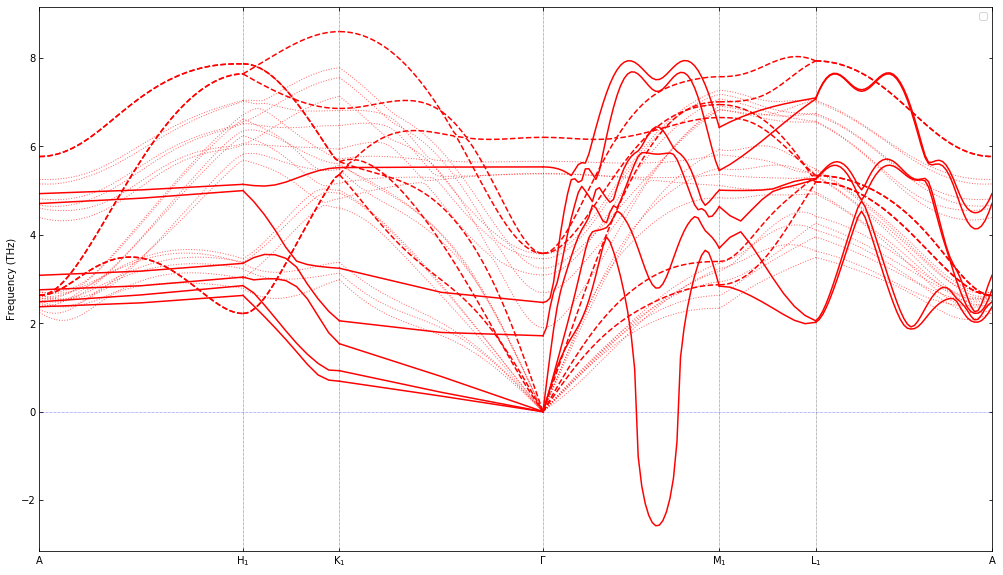

In [33]:
fig = plt.figure(figsize=(20,10))
shear_analyzer.plot_bands(fig=fig,
                          band_labels=band_labels1,
                          segment_qpoints=segs1)
# shear_analyzer.plot_bands(fig=fig, is_auto=True)

In [19]:
fig = plt.figure(figsize=(20,10))
shear_analyzer.plot_bands(fig=fig,
                          band_labels=band_labels2,
                          segment_qpoints=segs2)

AttributeError: 'Primitive' object has no attribute 'get_numbers'

<Figure size 1440x720 with 0 Axes>

In [8]:
fig = plt.figure(figsize=(20,10))
shear_analyzer.plot_bands(fig=fig,
                          band_labels=band_labels2,
                          segment_qpoints=segs2)

NameError: name 'band_labels2' is not defined

<Figure size 1440x720 with 0 Axes>

In [9]:
prim_lat = shear_analyzer._phonons[0].primitive.get_cell()
prim_posi = shear_analyzer._phonons[0].primitive.get_scaled_positions()
prim_symbols = shear_analyzer._phonons[0].primitive.get_chemical_symbols()
prim_cell = (prim_lat, prim_posi, prim_symbols)

In [10]:
orig_cell = shear_analyzer.original_cells[0]

In [11]:
orig_cell

(array([[-1.44793731, -2.50790099,  0.        ],
        [-1.44793731,  2.50790099,  0.        ],
        [ 0.        ,  0.        , -4.58298989]]),
 array([[0.33333333, 0.66666667, 0.25      ],
        [0.66666667, 0.33333333, 0.75      ]]),
 ['Ti', 'Ti'])

In [259]:
from twinpy.structure.base import get_phonopy_structure

In [269]:
primitive = get_phonopy_structure(cell=orig_cell,
                                  structure_type='primitive')
p_lattice = primitive.get_cell()
p_posi = primitive.get_scaled_positions()
p_symbol = primitive.get_chemical_symbols()
primitive_cell = (p_cell, p_posi, p_symbol)
write_poscar(filename='primitive.poscar', *primitive_cell)
write_poscar(filename='original.poscar', *orig_cell)

primitive.poscar
original.poscar


In [270]:
primitive = get_phonopy_structure(cell=orig_cell,
                                  structure_type='conventional')
p_lattice = primitive.get_cell()
p_posi = primitive.get_scaled_positions()
p_symbol = primitive.get_chemical_symbols()
primitive_cell = (p_cell, p_posi, p_symbol)
write_poscar(filename='conventional.poscar', *primitive_cell)

conventional.poscar


In [13]:
P = np.dot(prim_cell[0].T, np.linalg.inv(orig_cell[0].T))

In [20]:
np.dot(P, orig_cell[1].T)

array([[-0.74401694, -0.62200847],
       [ 0.0446582 , -0.4106836 ],
       [-0.25      , -0.75      ]])

In [40]:
import spglib
reduced_cell = spglib.delaunay_reduce(orig_cell[0])
reduced_cell

array([[ 2.89587462, -0.        , -0.        ],
       [ 1.44793731,  2.50790099, -0.        ],
       [-0.        , -0.        ,  4.58298989]])

In [38]:
prim_cell[0]

array([[ 2.89587462,  0.        ,  0.        ],
       [-1.44793731,  2.50790099,  0.        ],
       [ 0.        ,  0.        ,  4.58298989]])

(array([[-1.44793731, -2.50790099,  0.        ],
        [-1.44793731,  2.50790099,  0.        ],
        [ 0.        ,  0.        , -4.58298989]]),
 array([[0.33333333, 0.66666667, 0.25      ],
        [0.66666667, 0.33333333, 0.75      ]]),
 ['Ti', 'Ti'])

In [32]:
prim_cell

(array([[ 2.89587462,  0.        ,  0.        ],
        [-1.44793731,  2.50790099,  0.        ],
        [ 0.        ,  0.        ,  4.58298989]]),
 array([[0.66666667, 0.33333333, 0.75      ],
        [0.33333333, 0.66666667, 0.25      ]]),
 ['Ti', 'Ti'])

In [46]:
# np.dot(np.dot(np.linalg.inv(orig_cell[0].T), prim_cell[0].T), orig_cell[1].T).T % 1

array([[0.        , 0.66666667, 0.75      ],
       [1.        , 0.33333333, 0.25      ]])

In [47]:
prim_cell[1]

array([[0.66666667, 0.33333333, 0.75      ],
       [0.33333333, 0.66666667, 0.25      ]])

In [53]:
np.dot(prim_cell[0].T, prim_cell[1].T).T

array([[ 1.44793732e+00,  8.35966988e-01,  3.43724242e+00],
       [-1.44793731e-08,  1.67193400e+00,  1.14574747e+00]])

In [54]:
np.dot(orig_cell[0].T, orig_cell[1].T).T

array([[-1.44793731,  0.835967  , -1.14574747],
       [-1.44793731, -0.835967  , -3.43724242]])

In [107]:
reduced_cell = spglib.delaunay_reduce(orig_cell[0])
# M_f = np.dot(np.linalg.inv(orig_cell[0].T), reduced_cell.T)
print(orig_cell[0].T)
print(reduced_cell.T)
M_f = np.dot(np.linalg.inv(reduced_cell.T), orig_cell[0].T)
M_f

[[-1.44793731 -1.44793731  0.        ]
 [-2.50790099  2.50790099  0.        ]
 [ 0.          0.         -4.58298989]]
[[ 2.89587462  1.44793731 -0.        ]
 [-0.          2.50790099 -0.        ]
 [-0.         -0.          4.58298989]]


array([[ 7.8448158e-17, -1.0000000e+00,  0.0000000e+00],
       [-1.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00, -1.0000000e+00]])

In [59]:
np.dot(np.linalg.inv(M_f), orig_cell[1].T).T % 1

array([[0.33333333, 0.33333333, 0.75      ],
       [0.66666667, 0.66666667, 0.25      ]])

In [61]:
prim_cell[1]

array([[0.66666667, 0.33333333, 0.75      ],
       [0.33333333, 0.66666667, 0.25      ]])

In [62]:
M_f

array([[-1.0000000e+00, -1.0000000e+00,  0.0000000e+00],
       [-1.0000000e+00,  7.8448158e-17,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00, -1.0000000e+00]])

In [88]:
R = np.dot(np.linalg.inv(prim_cell[0].T), reduced_cell.T)

In [89]:
R

array([[1., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [97]:
prim_cell[0]

array([[ 2.89587462,  0.        ,  0.        ],
       [-1.44793731,  2.50790099,  0.        ],
       [ 0.        ,  0.        ,  4.58298989]])

In [98]:
reduced_cell

array([[ 2.89587462, -0.        , -0.        ],
       [ 1.44793731,  2.50790099, -0.        ],
       [-0.        , -0.        ,  4.58298989]])

In [71]:
np.dot(R, np.dot(np.linalg.inv(M_f), orig_cell[1].T)).T % 1

array([[0.66666667, 0.33333333, 0.75      ],
       [0.33333333, 0.66666667, 0.25      ]])

In [73]:
prim_cell[1]

array([[0.66666667, 0.33333333, 0.75      ],
       [0.33333333, 0.66666667, 0.25      ]])

In [78]:
from twinpy.structure.base import get_original_to_primitive_cell_info

In [151]:
for i in range(len(shear_analyzer.original_cells)):
    orig_cell = shear_analyzer.original_cells[i]
    
    prim_lat = shear_analyzer._phonons[i].primitive.get_cell()
    prim_posi = shear_analyzer._phonons[i].primitive.get_scaled_positions()
    prim_symbols = shear_analyzer._phonons[i].primitive.get_chemical_symbols()
    prim_cell = (prim_lat, prim_posi, prim_symbols)
    
    
    M = orig_cell[0].T
    reduced_lat = spglib.delaunay_reduce(orig_cell[0])
    M_r = reduced_lat.T
    reduced_posi = np.dot(np.dot(np.linalg.inv(M_r), M),
                       orig_cell[1].T).T % 1
    R = np.dot(np.linalg.inv(M_r), M)
    print(np.dot(np.dot(R, reduced_lat.T), redu_posi.T).T)
    print(np.dot(np.dot(R, prim_cell[0].T), prim_cell[1].T).T)


[[-0.835967   -0.61197031 -3.43724242]
 [-1.67193399 -1.22394063 -1.14574747]]
[[-0.83596699 -0.61197034 -3.43724242]
 [-1.671934    1.67193402 -1.14574747]]
[[-0.77483857 -0.5672212  -3.54894976]
 [-1.62020994 -1.18607599 -1.24026907]]
[[ 7.50134794e-17  1.60790405e+00 -1.17177786e+00]
 [ 1.35972119e-16  3.28183429e+00 -3.51566339e+00]]
[[-0.71371014 -0.52247208 -3.66065711]
 [-1.56848589 -1.14821136 -1.33479067]]
[[-1.73660389e-17  1.55067555e+00 -1.19833457e+00]
 [-3.12019433e-17  3.22436305e+00 -3.59616016e+00]]
[[-0.65258171 -0.47772297 -3.77236446]
 [-1.51676183 -1.11034672 -1.42931227]]
[[ 1.23479127e-16  1.49145018e+00 -1.22571662e+00]
 [ 4.42887428e-16  3.18105705e+00 -3.67829426e+00]]
[[-0.93001073 -0.6808151  -3.60909987]
 [-1.57789026 -1.15509584 -0.97389002]]
[[ 0.87517641 -2.32311372 -3.76185149]
 [-0.87517641 -0.5727609  -1.2539505 ]]


In [258]:
from twinpy.file_io import write_poscar
n = 3
orig_cell = shear_analyzer.original_cells[n]

prim_lat = shear_analyzer._phonons[n].primitive.get_cell()
prim_posi = shear_analyzer._phonons[n].primitive.get_scaled_positions()
prim_symbols = shear_analyzer._phonons[n].primitive.get_chemical_symbols()
prim_cell = (prim_lat, prim_posi, prim_symbols)
reduced_lat = spglib.delaunay_reduce(orig_cell[0])
reduced_posi = np.dot(np.dot(np.linalg.inv(M_r), M),
                   orig_cell[1].T).T % 1
reduced_cell = (reduced_lat, reduced_posi, prim_symbols)

M = orig_cell[0].T
M_r = reduced_lat.T
M_r_bar = prim_lat.T

P = np.dot(M_r, np.linalg.inv(M_r_bar))
write_poscar(filename='/home/mizo/pos/orig.poscar', *orig_cell)
write_poscar(filename='/home/mizo/pos/redu.poscar', *reduced_cell)
write_poscar(filename='/home/mizo/pos/prim.poscar', *prim_cell)

/home/mizo/pos/orig.poscar
/home/mizo/pos/redu.poscar
/home/mizo/pos/prim.poscar


In [235]:
P

array([[-8.64137498e-01,  5.00000000e-01,  5.71522938e-02],
       [-4.98910018e-01, -8.66025405e-01,  3.29968922e-02],
       [ 6.59937835e-02,  1.68234930e-18,  9.97820034e-01]])

In [236]:
np.dot(P, M_r_bar)

array([[-2.74927495, -1.30133764,  0.29319935],
       [ 0.08463936, -2.42326163,  0.16927872],
       [ 0.15467171,  0.15467171,  4.89233331]])

In [237]:
M_r

array([[-2.74927495, -1.30133764,  0.29319935],
       [ 0.08463936, -2.42326163,  0.16927872],
       [ 0.15467171,  0.15467171,  4.89233331]])

In [248]:
np.dot(np.linalg.inv(M_r_bar),
       np.dot(np.dot(P, M_r), reduced_posi.T).T

SyntaxError: unexpected EOF while parsing (<ipython-input-248-5d5d51283a1e>, line 2)

In [256]:
hoge = np.dot(np.linalg.inv(M_r_bar),
              np.dot(np.dot(P, M_r), reduced_posi.T)).T % 1

In [257]:
prim_posi - hoge

array([[-0.13541666,  0.06499995, -0.50522232],
       [-0.03714293,  0.05171751,  0.49740005]])